In [1]:
# ! pip install --user librosa

In [1]:
from pathlib import Path
from scipy.io import wavfile
import scipy.signal
import pandas as pd
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import librosa

## Read data

In [2]:
intermediate_folder = Path('..') / 'data' / 'intermediate'

In [10]:
X_train = np.load(intermediate_folder / 'train_main_1_sec_audio_mfcc.npy')
# X_train = np.transpose(X_train, (0, 2, 1))
X_train.shape

(33566, 20, 32)

In [11]:
X_val = np.load(intermediate_folder / 'val_main_1_sec_audio_mfcc.npy')
# X_val = np.transpose(X_val, (0, 2, 1))
X_val.shape

(4619, 20, 32)

In [12]:
X_test = np.load(intermediate_folder / 'test_main_1_sec_audio_mfcc.npy')
# X_test = np.transpose(X_test, (0, 2, 1))
X_test.shape

(4689, 20, 32)

In [6]:
y_train = pd.read_csv(intermediate_folder / 'train_main_1_sec_labels.csv', header=None, index_col=False)[0]
y_val = pd.read_csv(intermediate_folder / 'val_main_1_sec_labels.csv', header=None, index_col=False)[0]
y_test = pd.read_csv(intermediate_folder / 'test_main_1_sec_labels.csv', header=None, index_col=False)[0]
y_train.shape, y_val.shape, y_test.shape

((33566,), (4619,), (4689,))

## EDA

In [14]:
SAMPLE_RATE = 16000

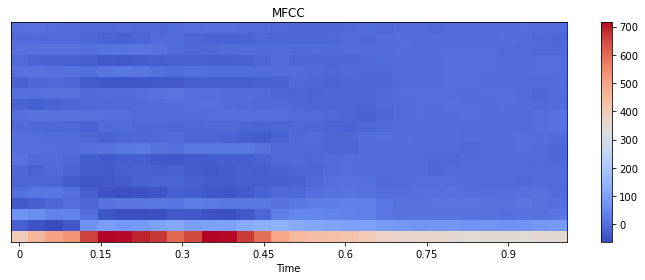

In [17]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(X_train[0], x_axis='time', sr=SAMPLE_RATE)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

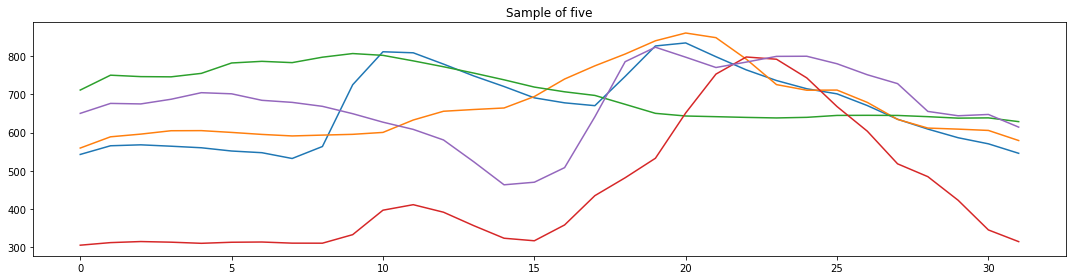

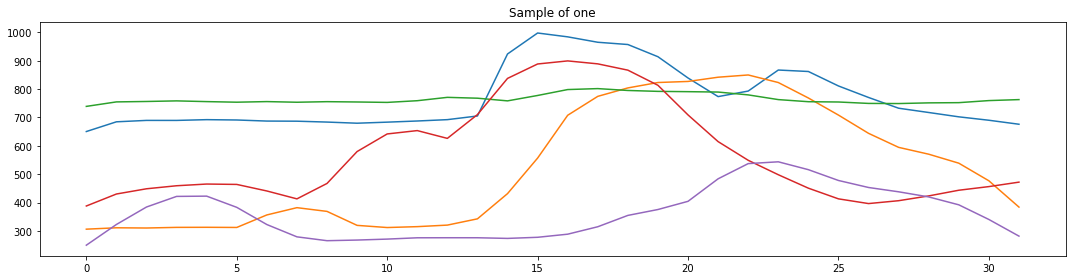

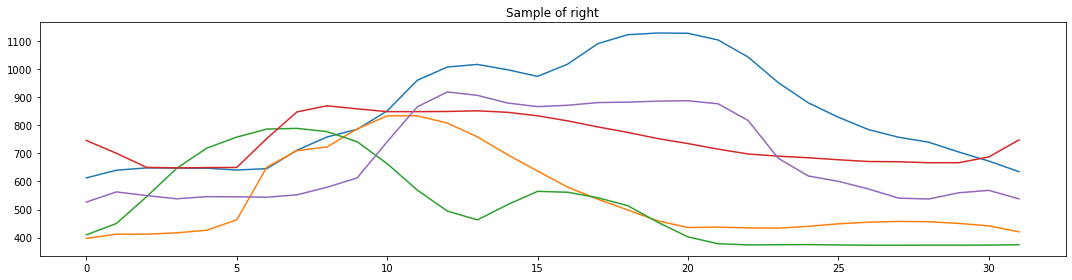

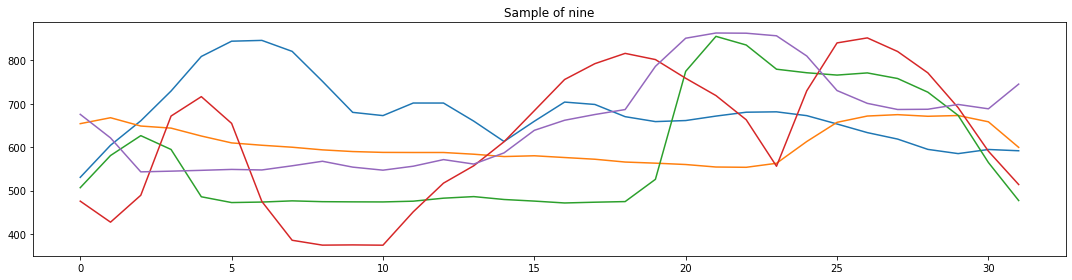

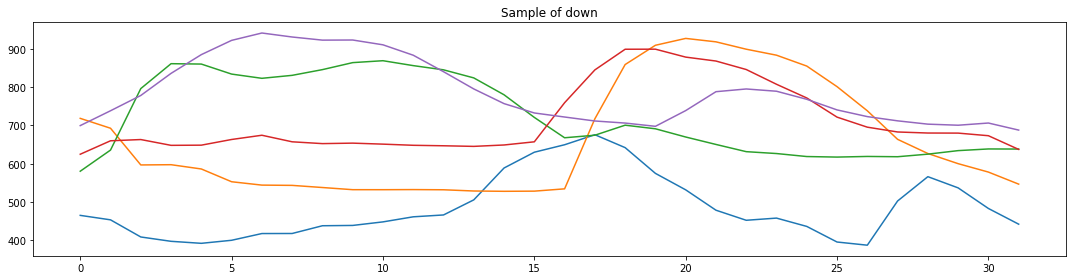

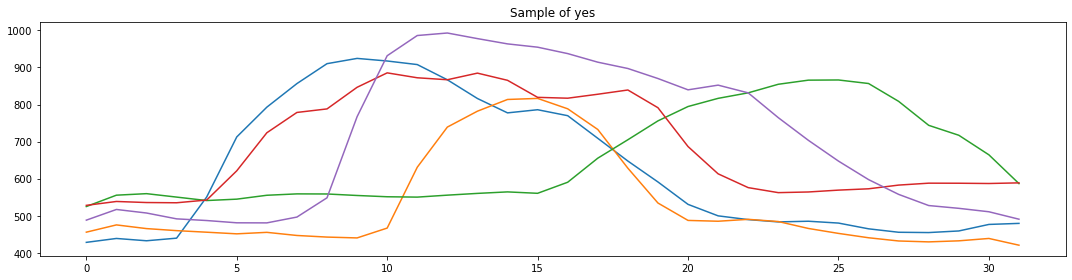

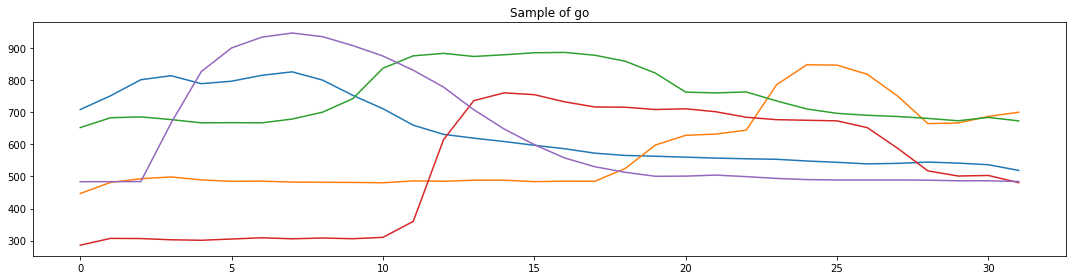

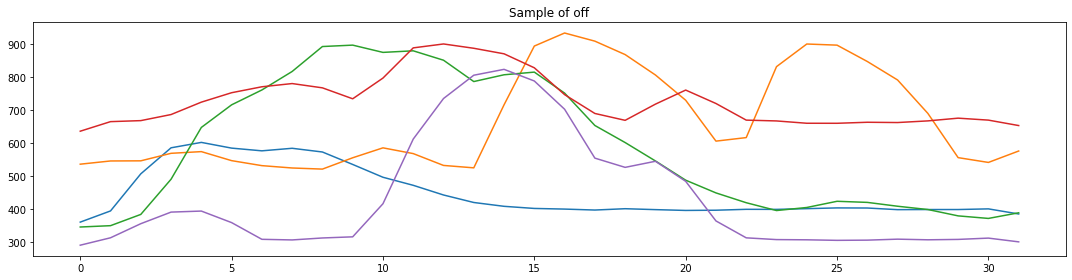

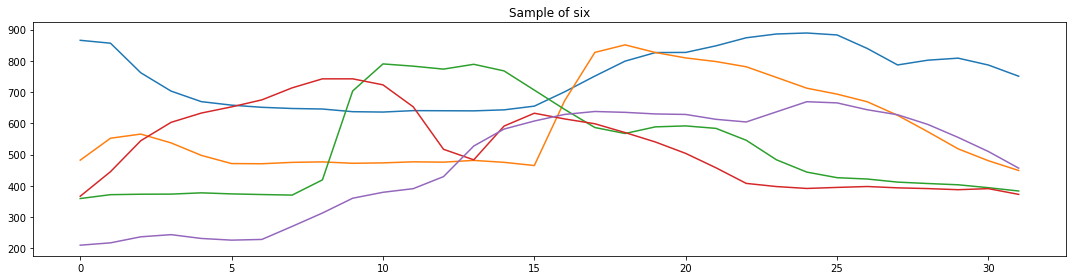

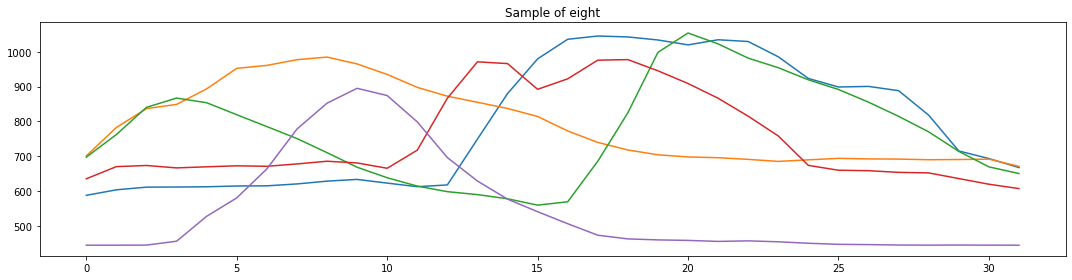

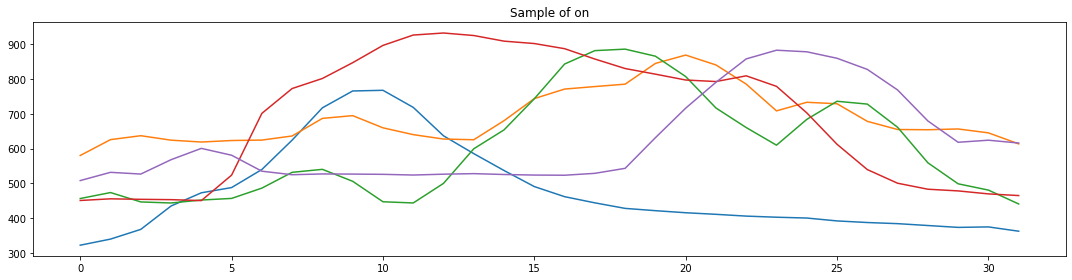

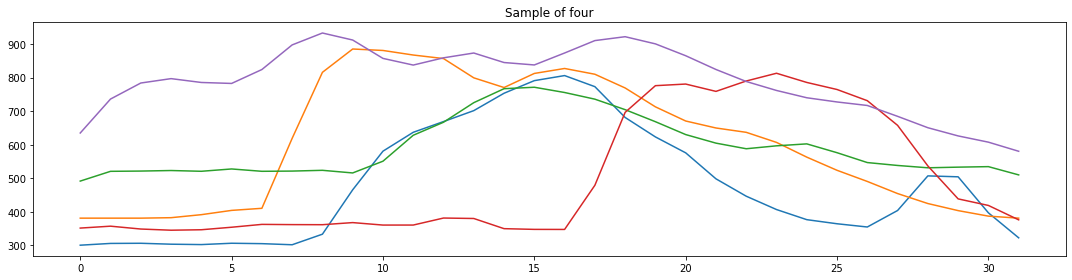

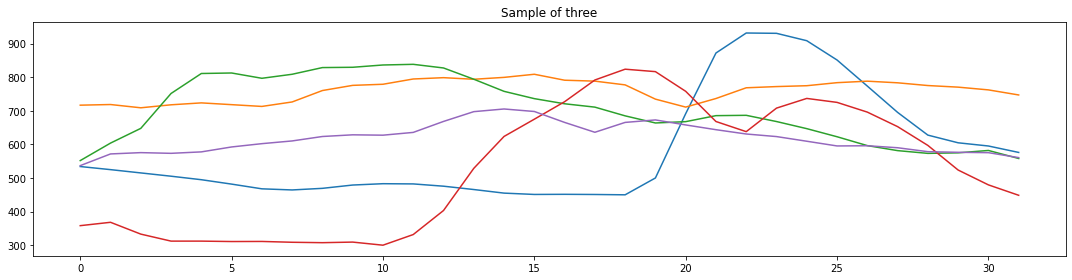

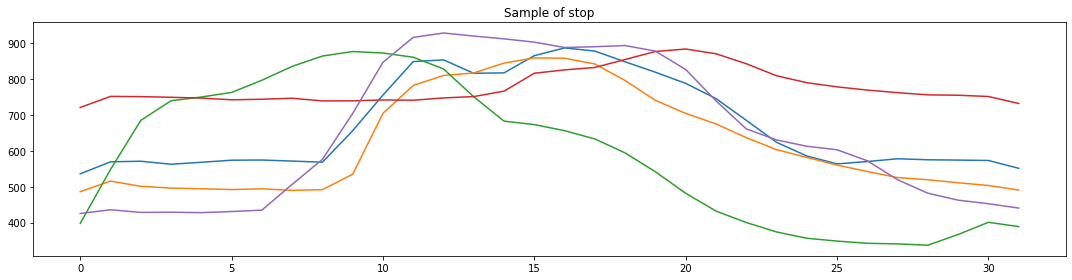

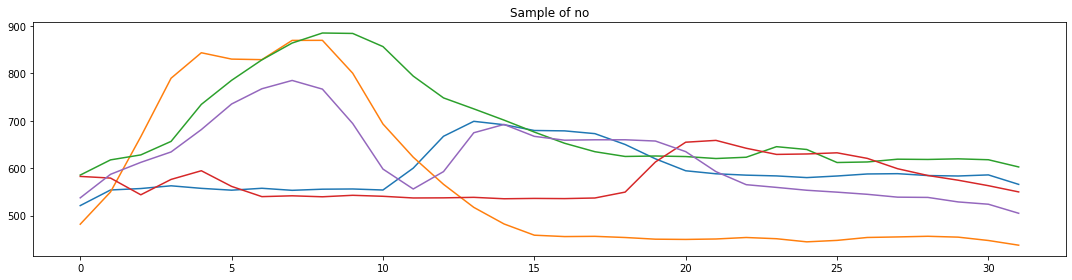

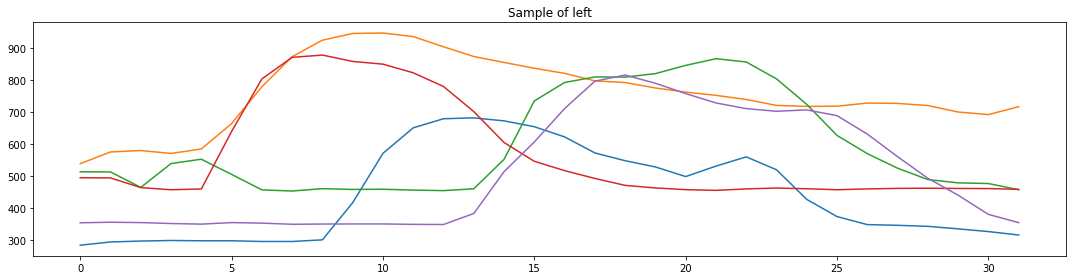

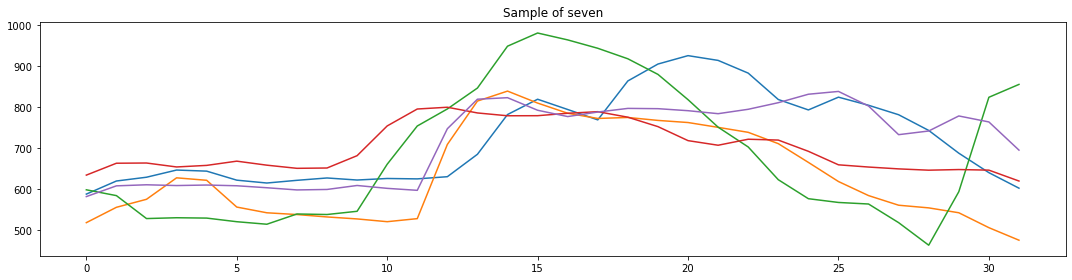

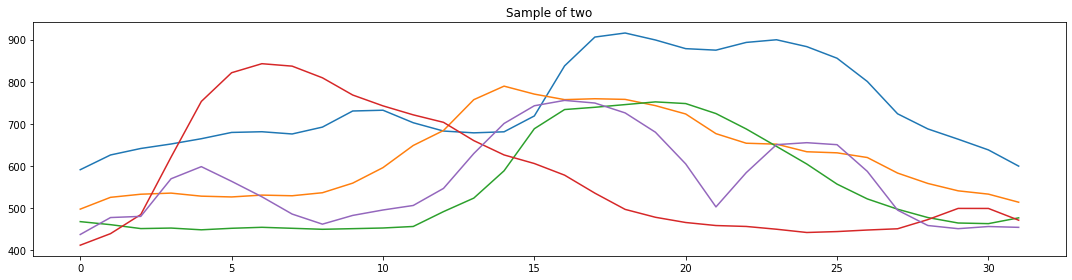

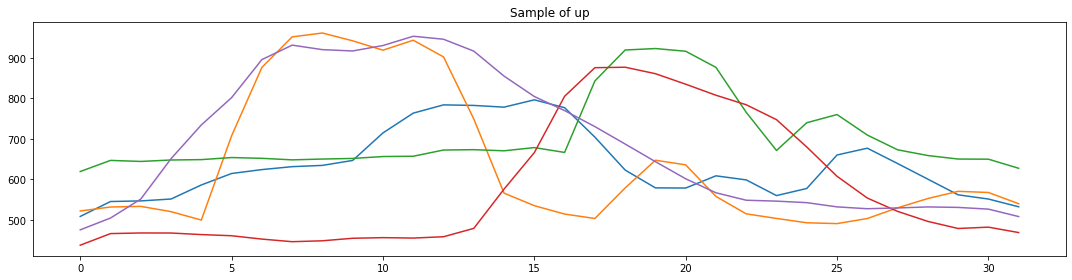

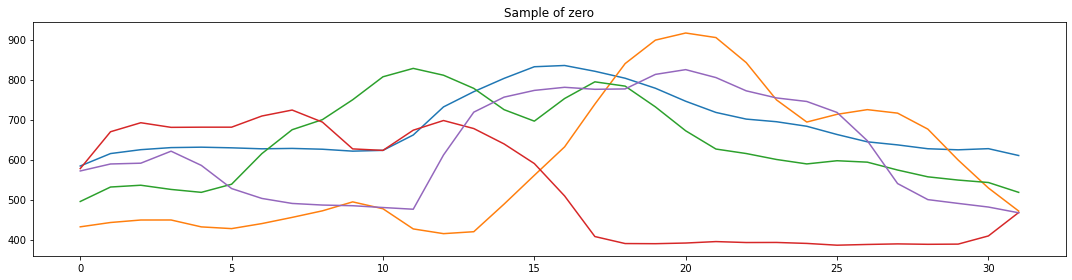

In [49]:
for label in y_train.unique():
    plt.figure(figsize=(15, 4))
    subset = X_train[y_train == label]
    sample_index = np.random.randint(subset.shape[0], size=5)
    sampl = subset[sample_index]
    for i in range(sampl.shape[0]):
        plt.plot(sampl[i, 0])
    plt.title(f'Sample of {label}')
    plt.tight_layout()
    plt.show()

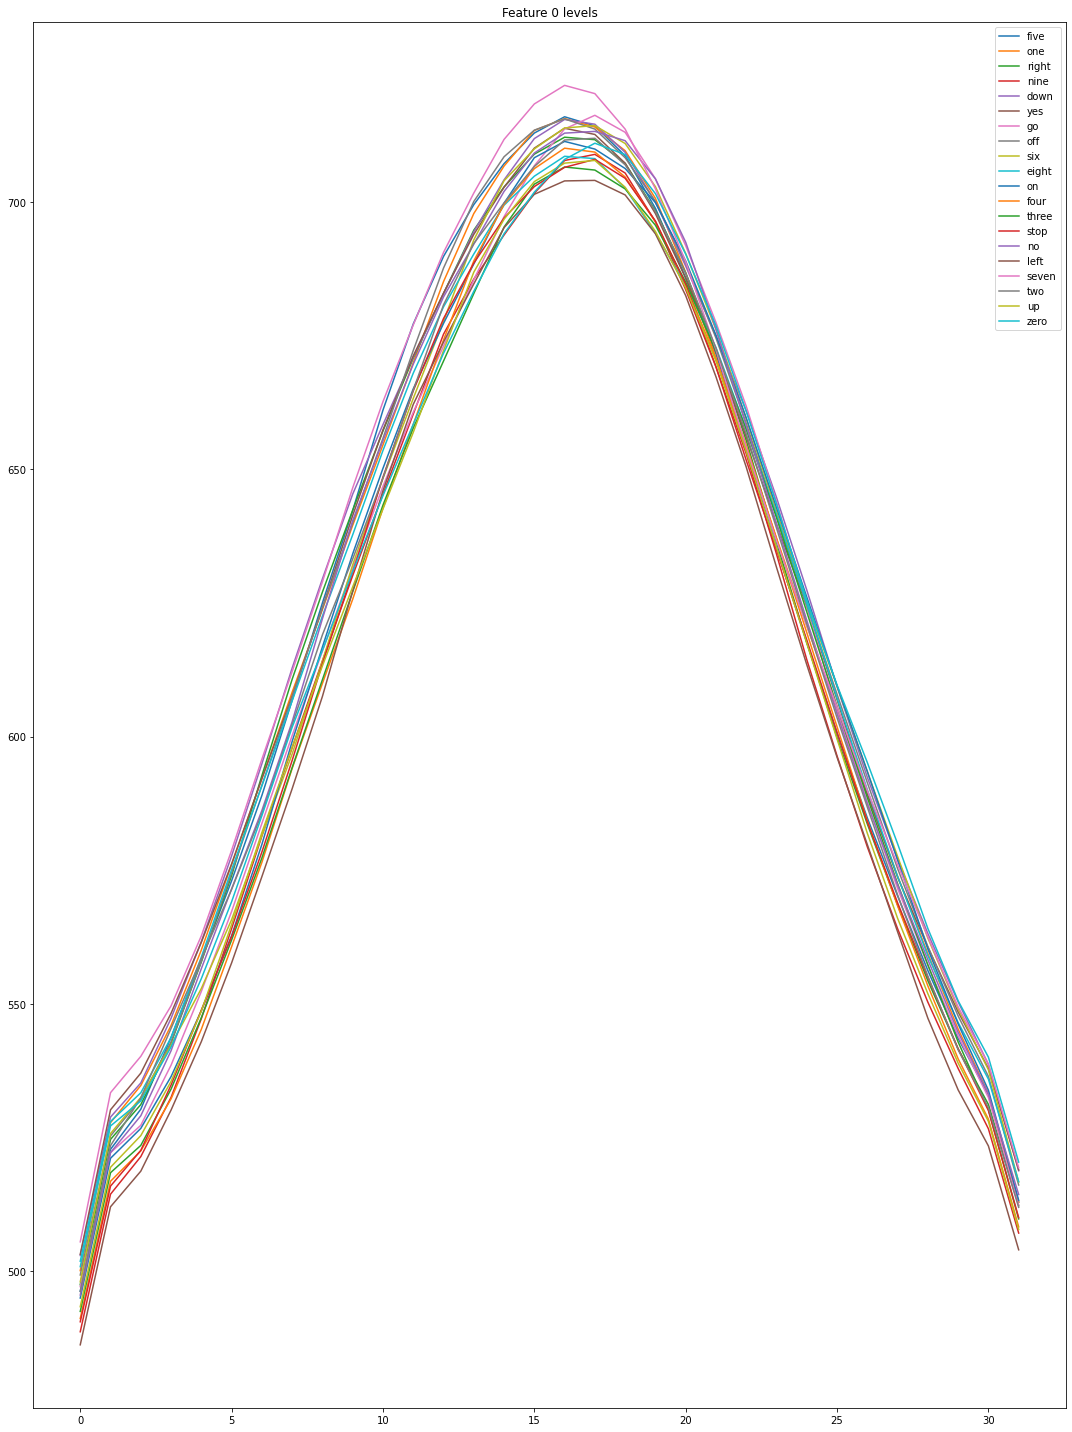

In [30]:
plt.figure(figsize=(15, 20))
for label in y_train.unique():
    plt.plot(X_train[y_train == label][:, 0].mean(axis=0), label=label)

plt.title('Feature 0 levels')
plt.legend()
plt.tight_layout()
plt.show()

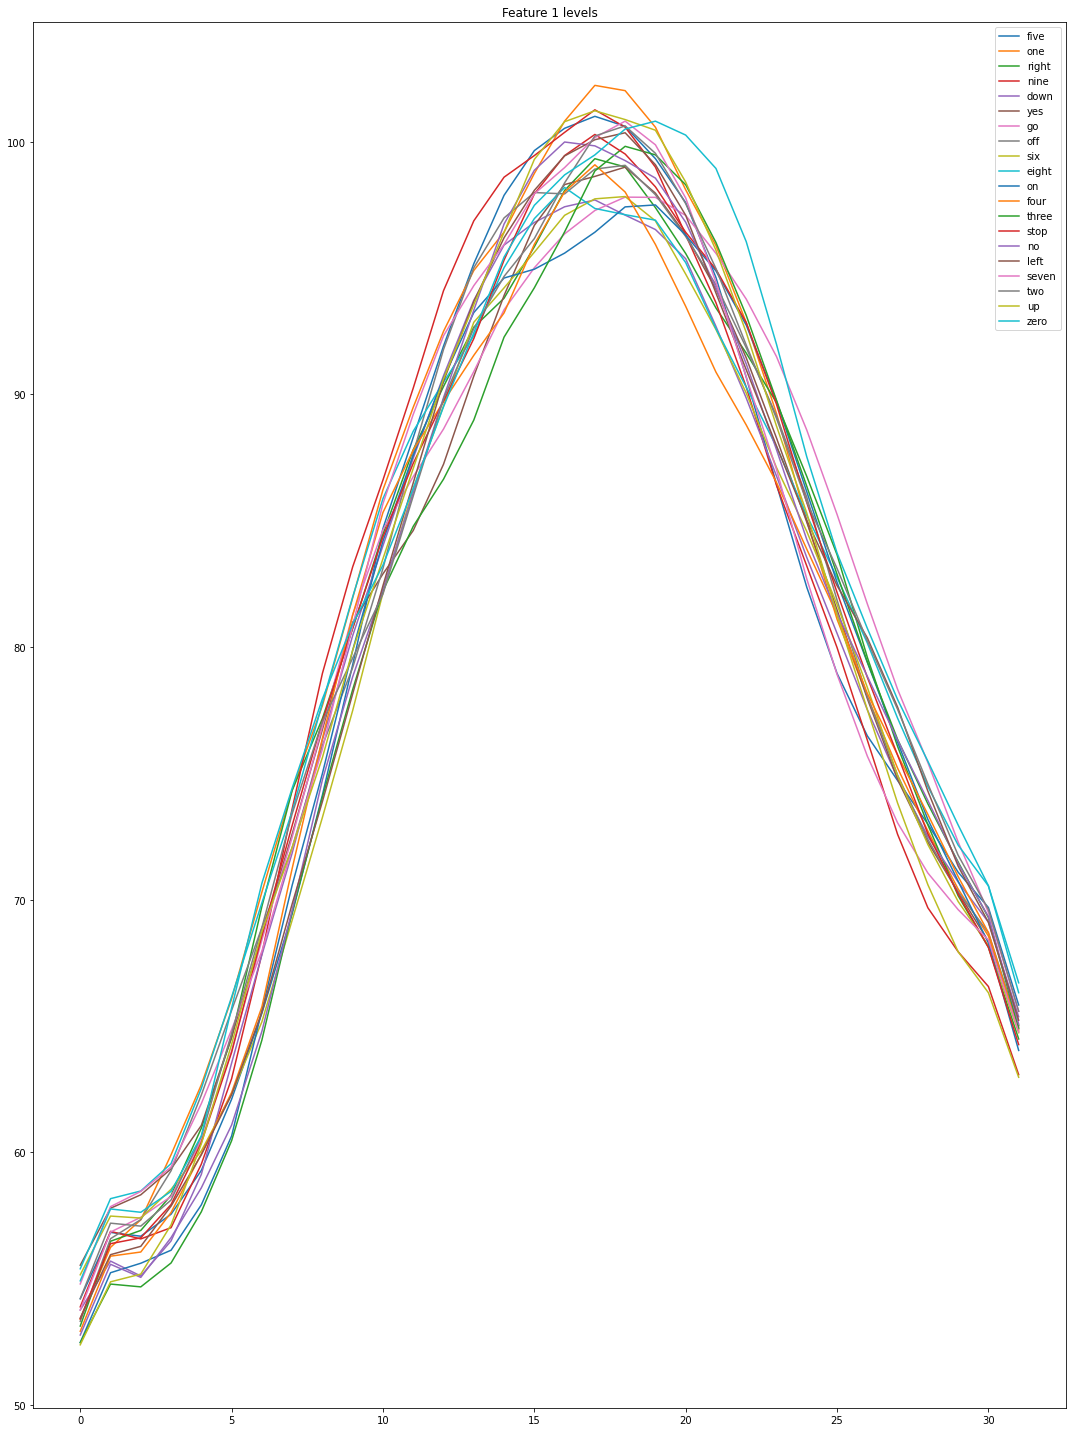

In [29]:
plt.figure(figsize=(15, 20))
for label in y_train.unique():
    plt.plot(X_train[y_train == label][:, 1].mean(axis=0), label=label)

plt.title('Feature 1 levels')
plt.legend()
plt.tight_layout()
plt.show()

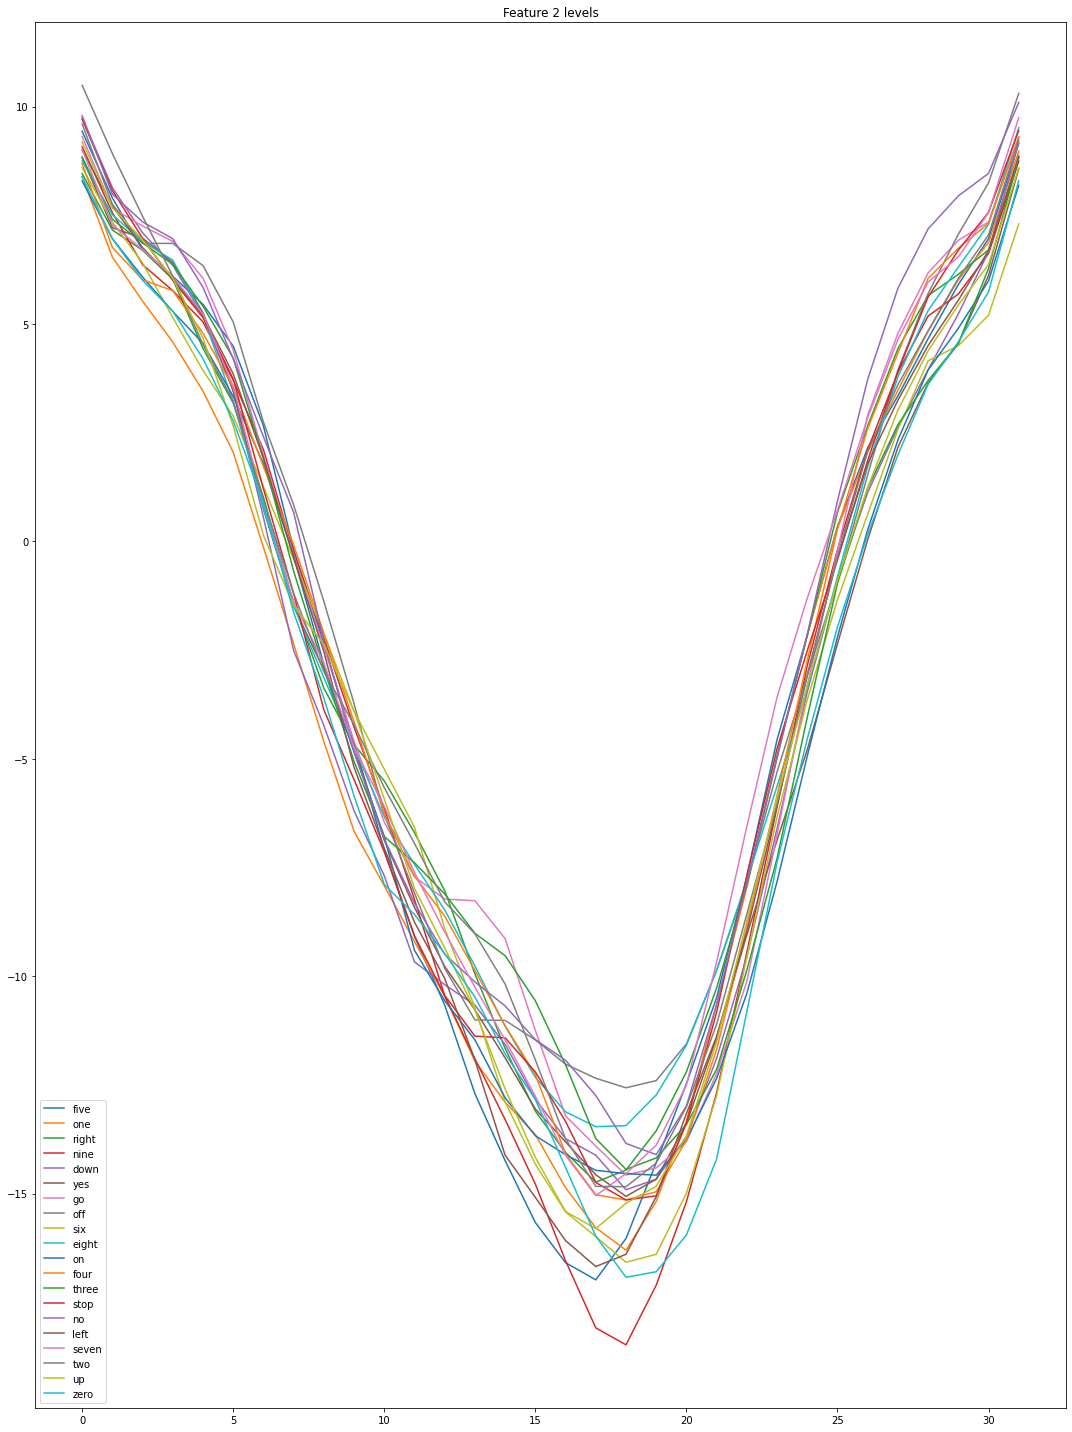

In [31]:
plt.figure(figsize=(15, 20))
for label in y_train.unique():
    plt.plot(X_train[y_train == label][:, 2].mean(axis=0), label=label)

plt.title('Feature 2 levels')
plt.legend()
plt.tight_layout()
plt.show()

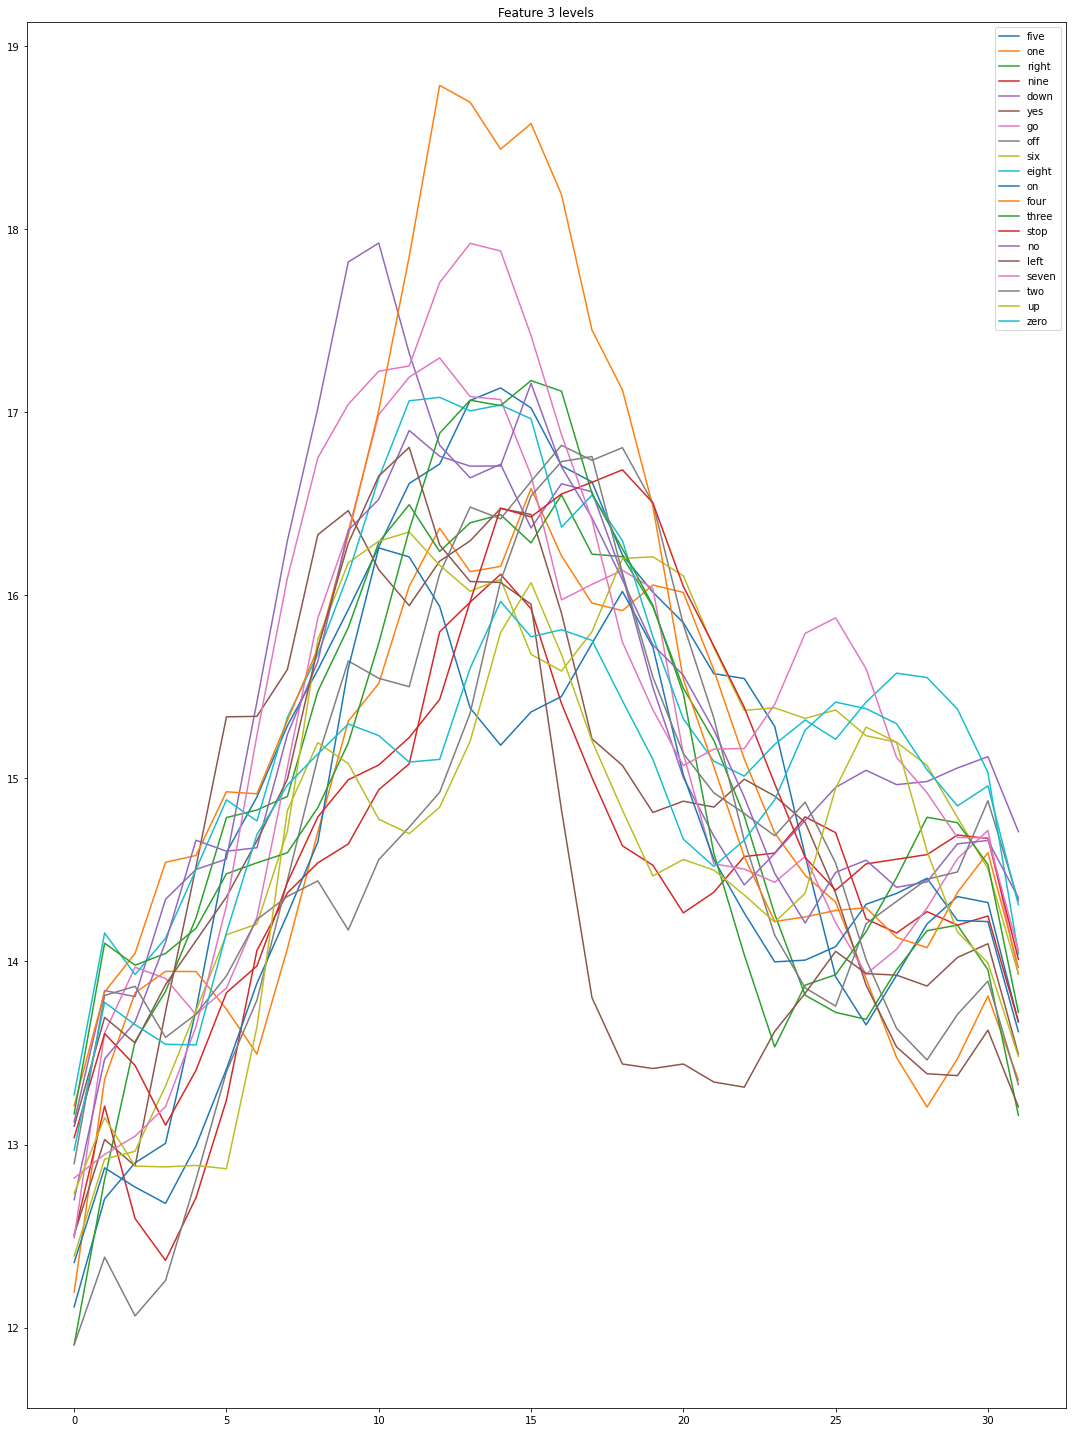

In [34]:
plt.figure(figsize=(15, 20))
for label in y_train.unique():
    plt.plot(X_train[y_train == label][:, 3].mean(axis=0), label=label)

plt.title('Feature 3 levels')
plt.legend()
plt.tight_layout()
plt.show()

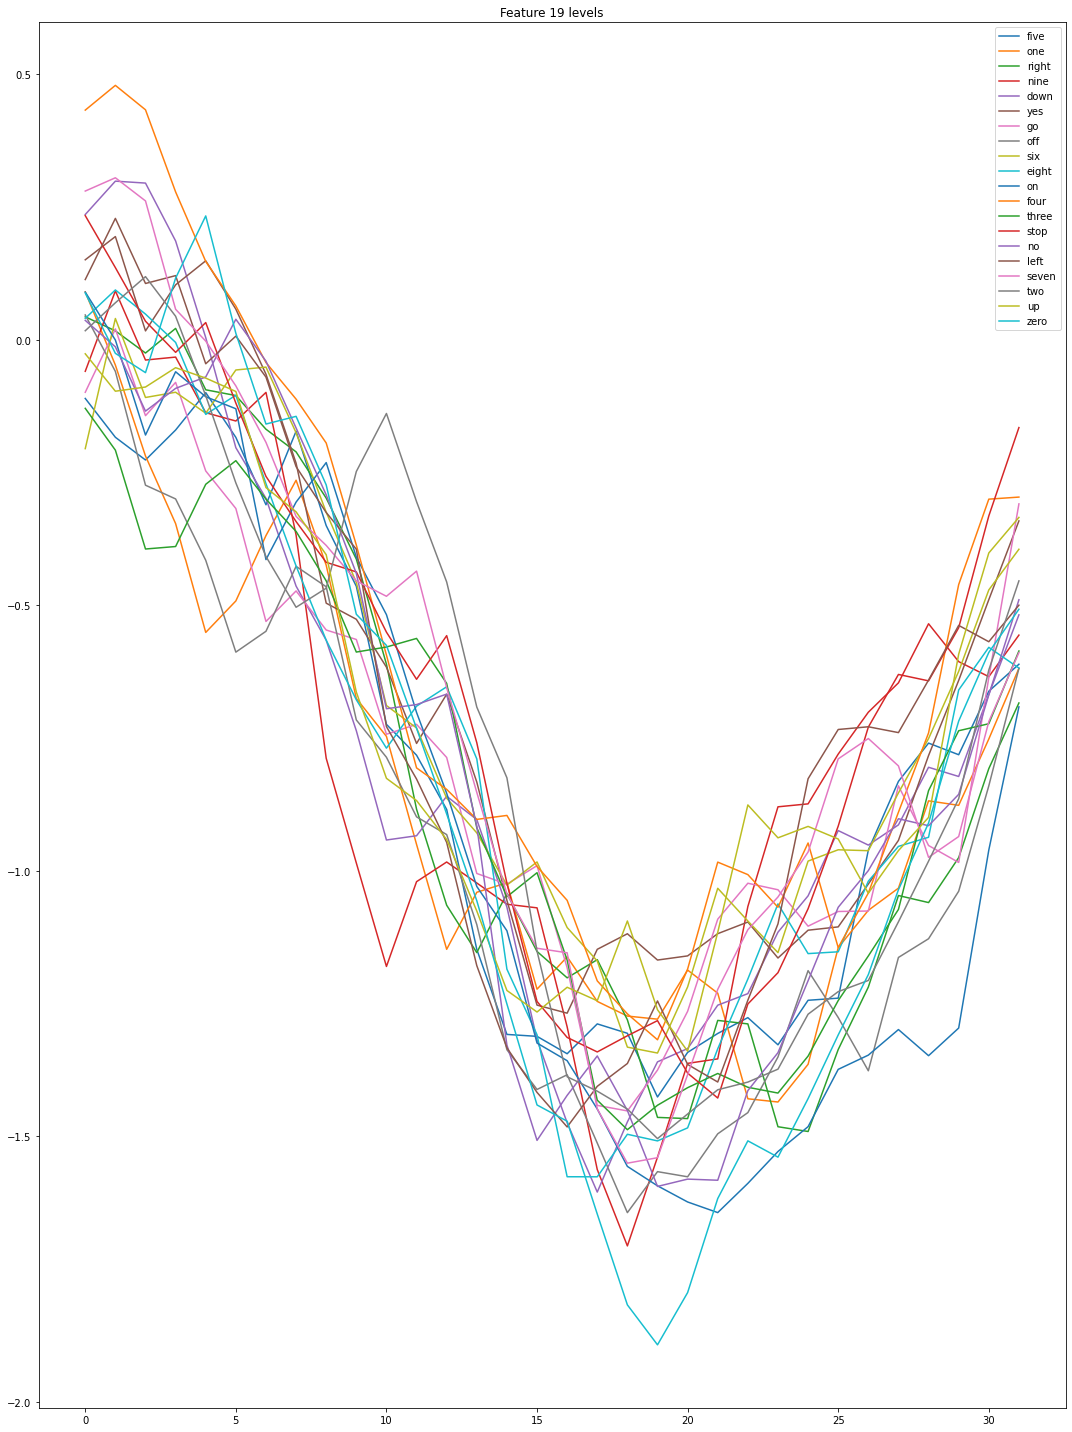

In [33]:
plt.figure(figsize=(15, 20))
for label in y_train.unique():
    plt.plot(X_train[y_train == label][:, 19].mean(axis=0), label=label)

plt.title('Feature 19 levels')
plt.legend()
plt.tight_layout()
plt.show()

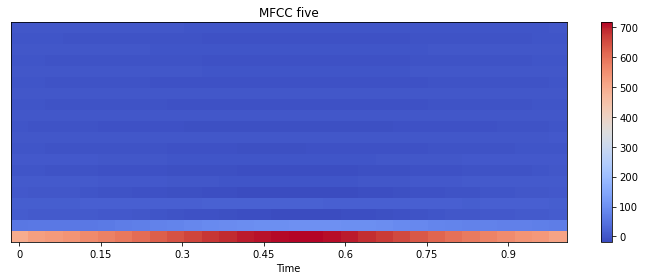

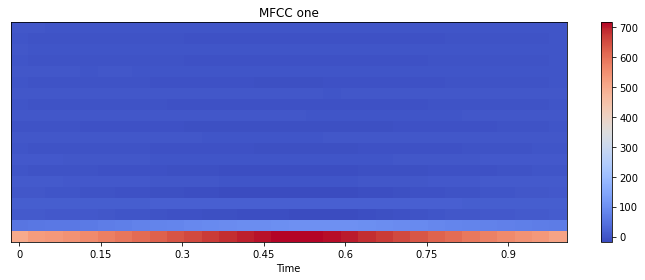

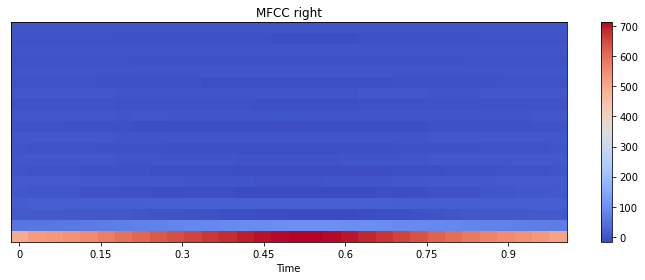

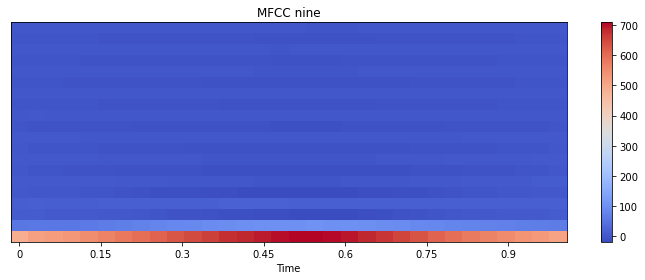

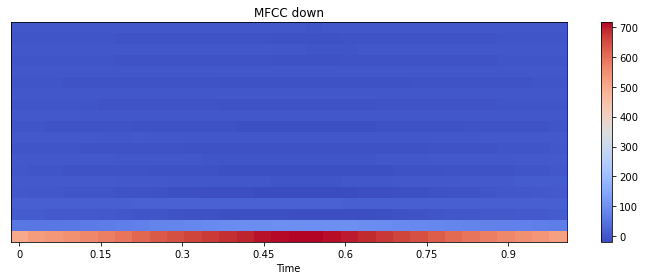

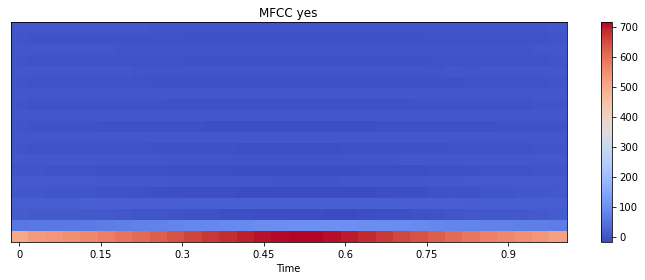

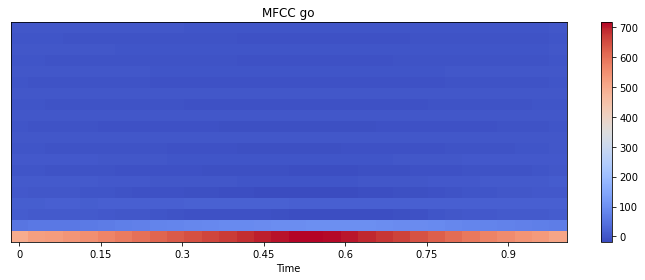

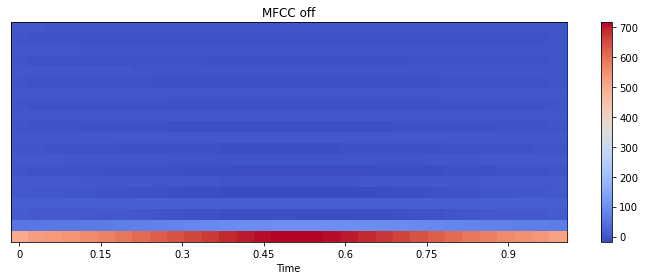

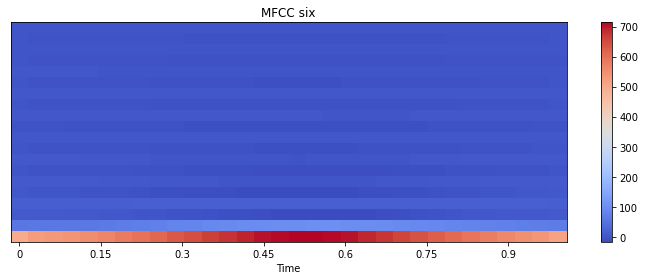

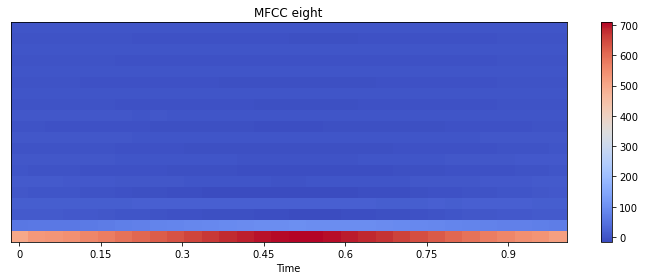

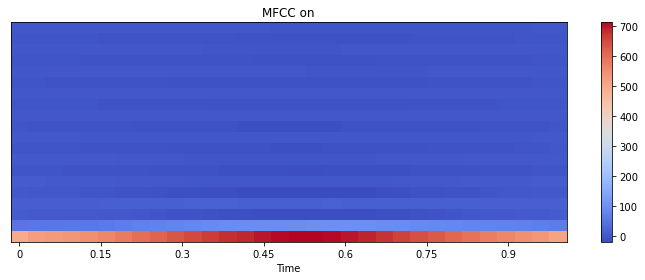

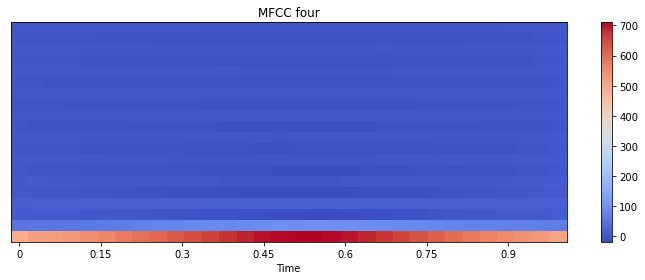

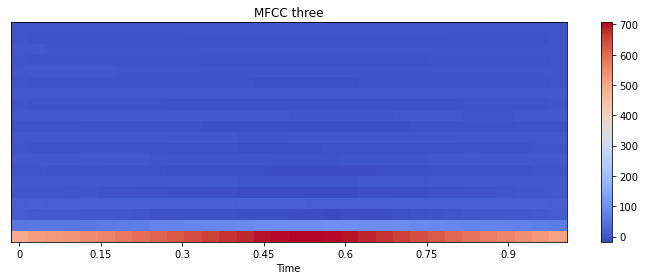

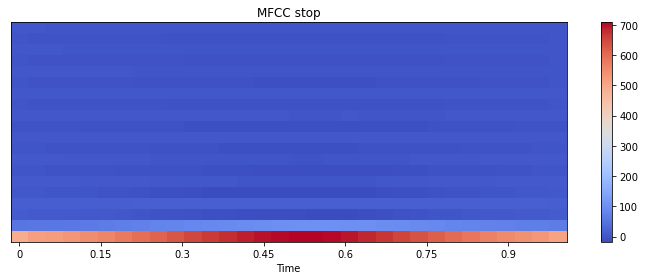

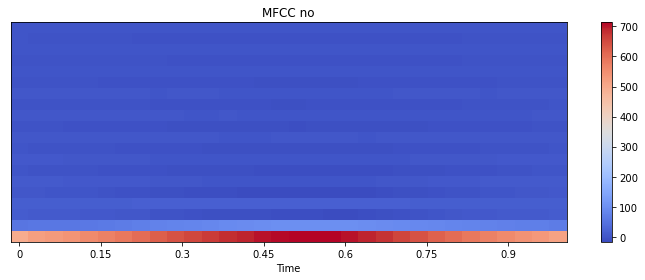

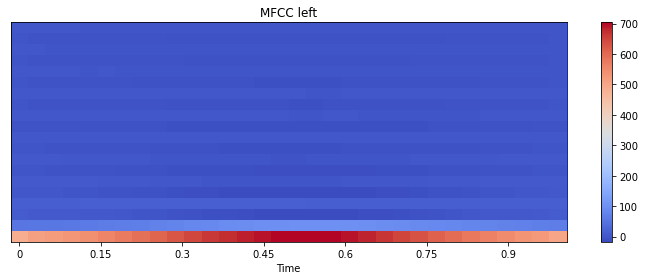

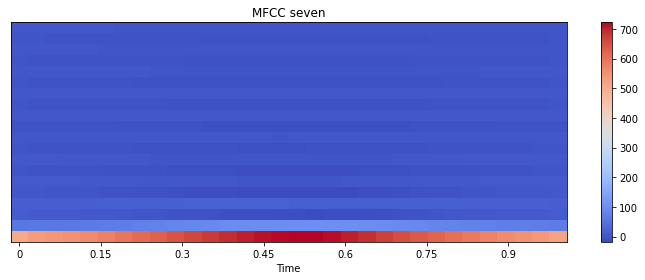

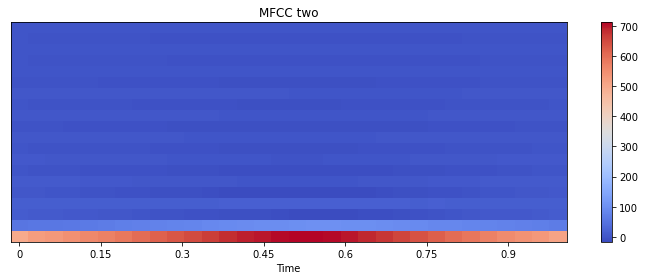

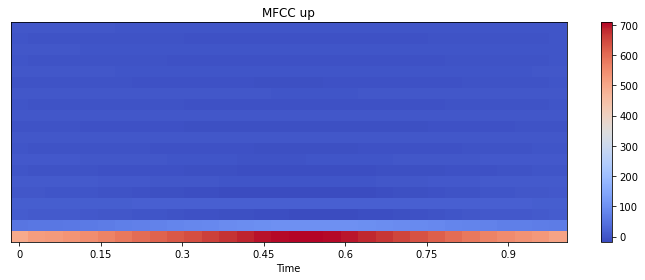

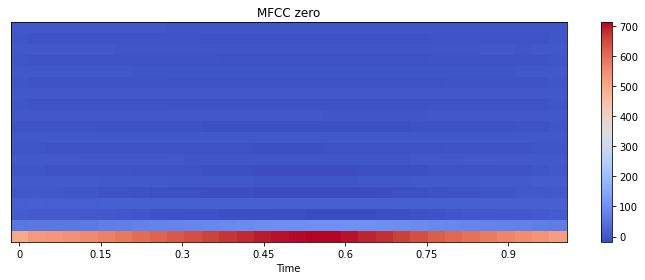

In [21]:
for label in y_train.unique():
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(X_train[y_train == label].mean(axis=0), x_axis='time', sr=SAMPLE_RATE)
    plt.colorbar()
    plt.title(f'MFCC {label}')
    plt.tight_layout()
    plt.show()